# Plea Bargganing Maps and Scatter Plot

In [1]:
import pandas as pd
import numpy as np

# I am blind without this
%config InlineBackend.figure_format = 'retina' 

# see all columns
pd.set_option("max_columns", 200)
regression_admissions = pd.read_csv('/Users/clarissaache/Documents/Capstone/JUSTFAIR_capstone/30_gis/plea_deltas_admissions.csv')
#regression_admissions['county_fips_code'] = regression_admissions['county_fips_code'].astype('str') 

/Users/clarissaache/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
regression_admissions.loc[regression_admissions['county_fips_code'].isna()]

,Unnamed: 0,case_id,CL_Rank,case_DELTA_cl,case_DELTA_ms,case_DELTA_cl_perc,case_DELTA_ms_perc,case_DELTA_cl_rel,case_DELTA_ms_rel,key_county_num,key_year,race,sex,court_attorney_type,process_served,prior_record_points,plea_code,def_zip_address,year,zip,county,usps_zip_pref_city,usps_zip_pref_state,county_fips_code,black_count_sys,white_count_sys,hisp_count_sys,total_count_sys,black_perc_sys,white_perc_sys,hisp_perc_sys,COUNTY,total,black_pop,white_pop,hisp_pop,other_pop,total_perc,black_pop_perc,white_pop_perc,hisp_pop_perc,other_pop_perc,white_rate_of_case,black_rate_of_case,times_b_more_likely_to_be_involved_in_case,trial_metric,weighted_rep_difference_b_w,_merge
15,15,1983015053,3.0,-3.0,-3.724464,-100.0,-100.0,-2.000000,-2.0,0,1983,White,Male,Waived Attorney,W,NaN,NaN,NaN,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
16,16,1983015420,3.0,-3.0,-3.724464,-100.0,-100.0,-2.000000,-2.0,0,1983,Black,Male,Waived Attorney,W,NaN,NaN,NaN,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
27,27,1984008341,3.0,-3.0,-3.724464,-100.0,-100.0,-2.000000,-2.0,0,1984,Black,Female,Waived Attorney,O,NaN,NaN,NaN,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
28,28,1984008366,3.0,-3.0,-3.724464,-100.0,-100.0,-2.000000,-2.0,0,1984,Black,Female,Waived Attorney,O,NaN,NaN,NaN,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
33,33,1984012021,3.0,-3.0,-3.724464,-100.0,-100.0,-2.000000,-2.0,0,1984,White,Male,Waived Attorney,O,NaN,NaN,NaN,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13540256,13540256,9902021700079,1.0,1.0,0.000000,100.0,0.0,0.666667,0.0,990,2021,White,Male,Public Defender ($ salaried),C,0.0,GU,29687.0,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
13540366,13540366,9902021700268,2.0,0.0,0.000000,0.0,0.0,0.000000,0.0,990,2021,White,Female,Public Defender ($ salaried),C,0.0,GU,46203.0,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
13540389,13540389,9902021700350,2.0,0.0,0.000000,0.0,0.0,0.000000,0.0,990,2021,White,Male,Public Defender ($ salaried),C,0.0,GU,22903.0,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
13540402,13540402,9902021700387,1.0,1.0,0.000000,100.0,0.0,0.666667,0.0,990,2021,White,Male,Public Defender ($ salaried),C,0.0,GU,37687.0,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [3]:
regression_admissions = regression_admissions.sort_values(['case_id','total', 'county_fips_code'], ascending=False).drop_duplicates(subset = 'case_id', keep='first')

deltas = regression_admissions[['case_DELTA_cl','case_DELTA_ms','case_DELTA_cl_rel','case_DELTA_ms_rel', 'county', 'race', 'sex']]

grouped_df = deltas.groupby(['county', 'race']).mean()
transposed_df = grouped_df.transpose(copy=True)
transposed_df

county              37001.0                                           37005.0  \
race                  Asian     Black  Hispanic     Other     White     Asian   
case_DELTA_cl     -5.333333 -7.732775 -3.308728 -4.812419 -7.211142 -1.666667   
case_DELTA_ms     -5.283358 -7.557431 -3.530846 -4.085901 -6.447000 -0.308964   
case_DELTA_cl_rel -1.572976 -1.499192 -1.050659 -1.336687 -1.494890 -2.000000   
case_DELTA_ms_rel -1.042519 -1.250351 -0.781506 -0.988098 -1.138209 -1.478299   

county                                                      37007.0            \
race                  Black  Hispanic     Other     White     Asian     Black   
case_DELTA_cl     -6.322581 -1.622204 -2.839506 -6.436127 -5.820513 -6.975587   
case_DELTA_ms     -6.751756 -1.367482 -1.442227 -6.265607 -9.889566 -5.155959   
case_DELTA_cl_rel -1.318288 -0.463793 -0.909379 -1.168580 -1.610101 -1.676325   
case_DELTA_ms_rel -1.023809 -0.502625 -0.758745 -0.993865 -0.670607 -1.318599   

county                                             37009.0            \
race               Hispanic     Other     White      Asian     Black   
case_DELTA_cl     -3.971098 -7.702128 -9.467093 -44.000000 -4.131868   
case_DELTA_ms     -5.088734 -7.458980 -8.972882 -16.720261 -5.096883   
case_DELTA_cl_rel -1.536714 -1.707429 -1.716701  -1.878788 -1.333098   
case_DELTA_ms_rel -1.007840 -1.327211 -1.331304  -0.729277 -1.146321   

county                                            37011.0                      \
race               Hispanic     Other     White     Black  Hispanic     Other   
case_DELTA_cl     -1.567568 -4.534884 -5.750953 -7.636364 -2.365385 -2.578947   
case_DELTA_ms     -0.950922 -2.800881 -5.867010 -3.259594 -4.457834 -2.445722   
case_DELTA_cl_rel -0.691748 -1.227335 -1.260069 -1.365583 -0.412202 -0.989474   
case_DELTA_ms_rel -0.564136 -0.971547 -1.115683 -1.366948 -0.595639 -0.898401   

county                         37013.0                                 \
race                  White      Asian      Black  Hispanic     Other   
case_DELTA_cl     -4.766610 -21.500000 -10.025306 -2.545635 -6.071651   
case_DELTA_ms     -5.812860 -24.260019 -10.656822 -1.323874 -8.429592   
case_DELTA_cl_rel -1.487428  -1.500000  -1.397076 -1.032961 -1.401258   
case_DELTA_ms_rel -1.077139  -0.524818  -1.189380 -0.771474 -1.109418   

county                         37015.0                                \
race                   White     Asian     Black  Hispanic     Other   
case_DELTA_cl      -9.673916 -1.714286 -8.708265 -1.291667 -5.547009   
case_DELTA_ms     -11.094499 -0.236472 -7.768000 -0.878542 -4.346283   
case_DELTA_cl_rel  -1.493936 -2.000000 -1.539034 -0.726888 -1.524223   
case_DELTA_ms_rel  -1.143114 -1.240794 -1.288301 -0.660020 -1.301194   

county                         37017.0                                \
race                   White     Asian     Black  Hispanic     Other   
case_DELTA_cl     -10.059481 -2.800000 -8.434415 -1.005190 -4.590708   
case_DELTA_ms     -11.959461 -0.632995 -7.708285 -1.742718 -3.697145   
case_DELTA_cl_rel  -1.563939 -1.428571 -1.579480 -0.472682 -1.514520   
case_DELTA_ms_rel  -1.220733 -0.592630 -1.241721 -0.437901 -1.050980   

county                        37019.0                                 \
race                  White     Asian      Black  Hispanic     Other   
case_DELTA_cl     -7.252806 -1.980000 -10.319388 -3.475921 -6.984203   
case_DELTA_ms     -5.392687 -0.726867 -10.656132 -3.893778 -7.023250   
case_DELTA_cl_rel -1.564337 -1.715359  -1.627877 -0.834074 -1.490456   
case_DELTA_ms_rel -1.187344 -0.622141  -1.306372 -0.762422 -1.213667   

county                        37021.0                                          \
race                  White     Asian     Black  Hispanic     Other     White   
case_DELTA_cl     -8.300033 -4.891892 -6.235932 -2.123796 -3.734107 -5.499971   
case_DELTA_ms     -6.938347 -4.917585 -5.769332 -1.869764 -2.982989 -4.241582   
case_DELTA_cl_rel -1.638440 -1.473776 -1.528

In [4]:
admissions = pd.read_csv('/Users/clarissaache/Documents/Capstone/JUSTFAIR_capstone/admissions_analysis_table.csv')
admissions.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
admissions.sample(5)

,county_fips_code,black_count_sys,white_count_sys,hisp_count_sys,total_count_sys,black_perc_sys,white_perc_sys,hisp_perc_sys,COUNTY,total,black_pop,white_pop,hisp_pop,other_pop,total_perc,black_pop_perc,white_pop_perc,hisp_pop_perc,other_pop_perc,white_rate_of_case,black_rate_of_case,times_b_more_likely_to_be_involved_in_case,trial_metric,weighted_rep_difference_b_w
13,37027.0,37401.0,210721.0,20455.0,276056.0,13.548338,76.332701,7.409728,Caldwell County,81805,4027,71921,4266,1591,100.0,4.922682,87.917609,5.214840,1.944869,2.929895,9.287559,3.169929,1.883997,1.883997
27,37055.0,2241.0,33776.0,3272.0,41016.0,5.463721,82.348352,7.977375,Dare County,35412,756,31005,2555,1096,100.0,2.134870,87.555066,7.215068,3.094996,1.089373,2.964286,2.721094,1.618744,1.618744
63,37127.0,158325.0,81086.0,18014.0,265450.0,59.644001,30.546619,6.786212,Nash County,94125,37007,47943,6747,2428,100.0,39.316866,50.935458,7.168127,2.579548,1.691300,4.278245,2.529560,0.917296,0.917296
37,37075.0,47.0,11889.0,209.0,13684.0,0.343467,86.882490,1.527331,Graham County,8607,14,7519,98,976,100.0,0.162658,87.359126,1.138608,11.339607,1.581194,3.357143,2.123169,1.117041,1.117041
30,37061.0,46577.0,60032.0,41128.0,158430.0,29.399104,37.891813,25.959730,Duplin County,59350,14723,30743,12922,962,100.0,24.807077,51.799495,21.772536,1.620893,1.952705,3.163554,1.620088,0.453600,0.453600


In [5]:
regression_admissions.loc[(regression_admissions['county_fips_code']==37075), 'COUNTY'] # this county only has 25 cases and they are all white people and 2 hispanics

11534400    Graham County
11530174    Graham County
11508415    Graham County
11508414    Graham County
11508413    Graham County
11508256    Graham County
7500293     Graham County
7460517     Graham County
7418259     Graham County
6552818     Graham County
6530893     Graham County
6525295     Graham County
5950893     Graham County
5871529     Graham County
4727473     Graham County
4727472     Graham County
4727152     Graham County
4727069     Graham County
4726663     Graham County
4726647     Graham County
4724927     Graham County
4724926     Graham County
4723452     Graham County
4719516     Graham County
2284005     Graham County
2267872     Graham County
Name: COUNTY, dtype: object

In [6]:
regression_admissions.loc[regression_admissions['county_fips_code']=='nan', 'county_fips_code']=np.nan
regression_admissions.loc[(regression_admissions['county_fips_code']==37075), 'county_fips_code']=np.nan
fips_codes = regression_admissions['county_fips_code'].dropna().unique()

fips_codes

array([37161., 37021., 37111., 37199., 37035., 37119., 37089., 37159.,
       37023., 37179., 37027., 37183., 37063., 37071., 37067., 37175.,
       37171., 37177., 37113., 37189., 37197., 37191., 37087., 37193.,
       37011., 37081., 37097., 37039., 37057., 37001., 37055., 37129.,
       37045., 37033., 37133., 37153., 37077., 37141., 37125., 37147.,
       37155., 37121., 37101., 37195., 37025., 37099., 37139., 37051.,
       37135., 37167., 37005., 37085., 37151., 37069., 37059., 37157.,
       37127., 37037., 37009., 37093., 37149., 37083., 37019., 37053.,
       37031., 37163., 37041., 37169., 37047., 37049., 37185., 37145.,
       37029., 37117., 37017., 37181., 37095., 37165., 37107., 37131.,
       37013., 37065., 37091., 37015., 37061., 37137., 37103., 37073.,
       37079., 37187., 37007., 37143., 37173., 37043., 37105., 37109.,
       37123.])

In [15]:
new_dict = {}
for i in fips_codes:
    new_dict[i] =  transposed_df[i]['White'] - transposed_df[i]['Black']
    


# if white is more lenient thant black, white is smaller number than black, smaller - larger = smaller

new_dict = pd.DataFrame(new_dict)
delta_b_w = new_dict.transpose(copy=True)
delta_b_w = delta_b_w.reset_index()
delta_b_w

,index,case_DELTA_cl,case_DELTA_ms,case_DELTA_cl_rel,case_DELTA_ms_rel
0,37161.0,0.225403,-0.115078,0.064423,0.061893
1,37021.0,0.735961,1.527750,0.070367,0.136948
2,37111.0,-0.660632,4.189037,-0.208693,-0.100923
3,37199.0,-1.299035,-1.569016,-0.242990,-0.200232
4,37035.0,0.178791,0.516348,0.003813,0.115437
...,...,...,...,...,...
92,37173.0,-0.174194,-0.551169,0.258445,0.366411
93,37043.0,1.363849,1.737621,-0.038124,0.164910
94,37105.0,9.777778,6.485964,0.131058,0.293580
95,37109.0,-7.631579,-9.088166,0.580461,-1.323717


Text(0, 0.5, 'Frequency of counties')

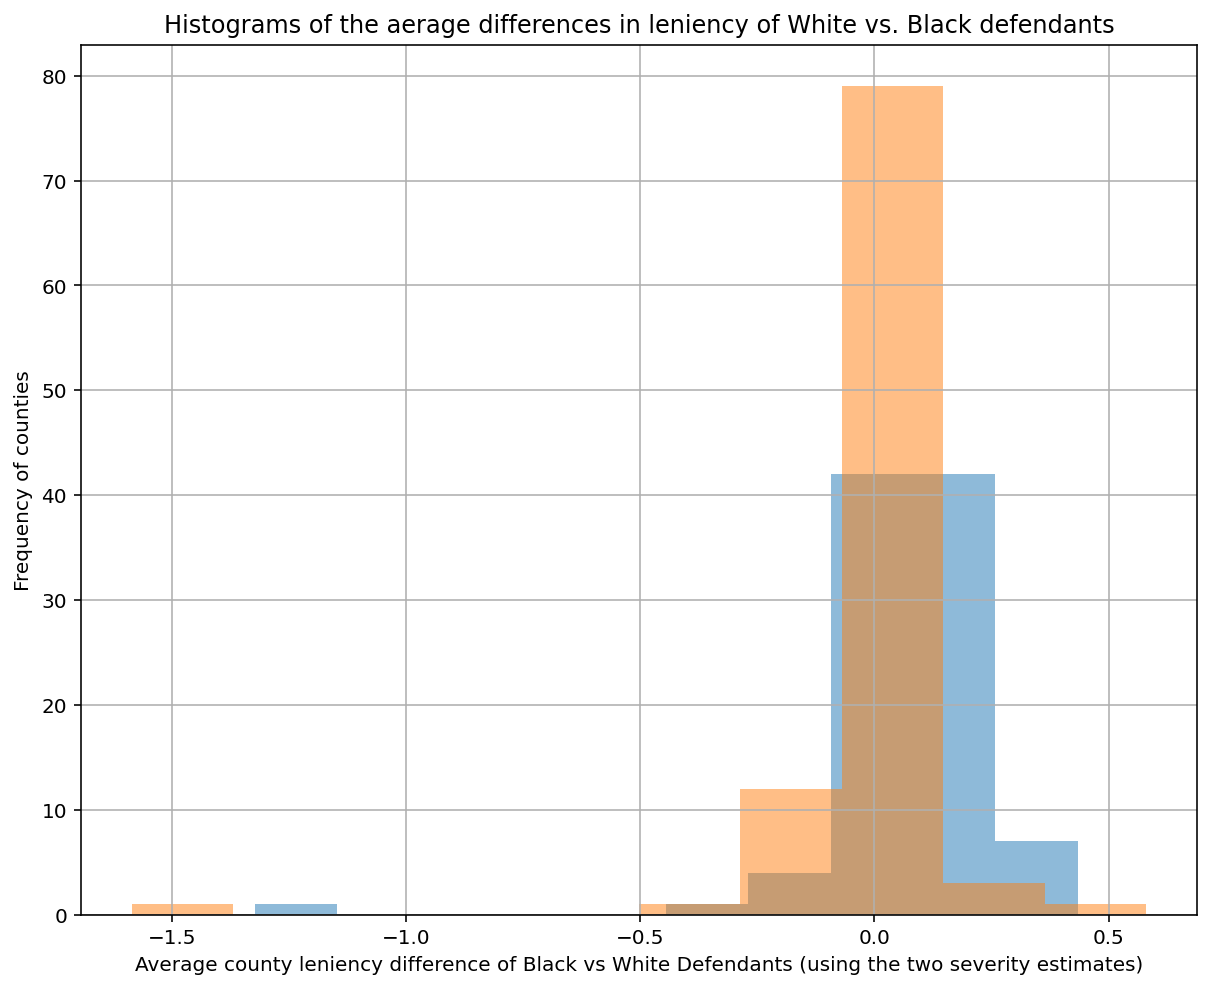

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('Histograms of the aerage differences in leniency of White vs. Black defendants')
delta_b_w.case_DELTA_ms_rel.hist(alpha=0.5) # min sentence severity, does say that BLACK is getting better deals!
delta_b_w.case_DELTA_cl_rel.hist(alpha=0.5) # CLASS RANK, white people are getting more lenient deals!
plt.xlabel('Average county leniency difference of Black vs White Defendants (using the two severity estimates)')
plt.ylabel('Frequency of counties')


<AxesSubplot:>

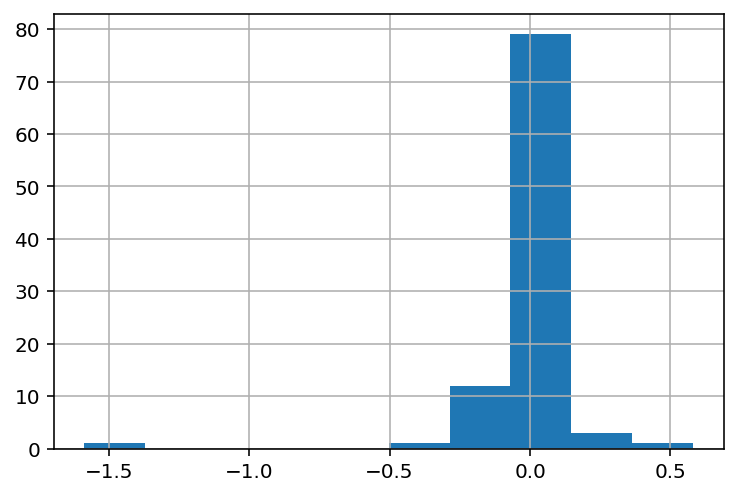

In [17]:
delta_b_w.case_DELTA_cl_rel.hist() # CLASS RANK, white people are getting more lenient deals!

In [19]:
# Diff in BLACK admissions
admissions['diff'] = admissions['black_perc_sys'] - admissions['black_pop_perc'] # need to ask preet
scatter = pd.merge(admissions, delta_b_w, right_on = 'index', left_on='county_fips_code', validate='1:1', indicator=True)
scatter._merge.value_counts()

both          97
left_only      0
right_only     0
Name: _merge, dtype: int64

Text(0, 0.5, 'Racial Difference in Plea Barganing Severity')

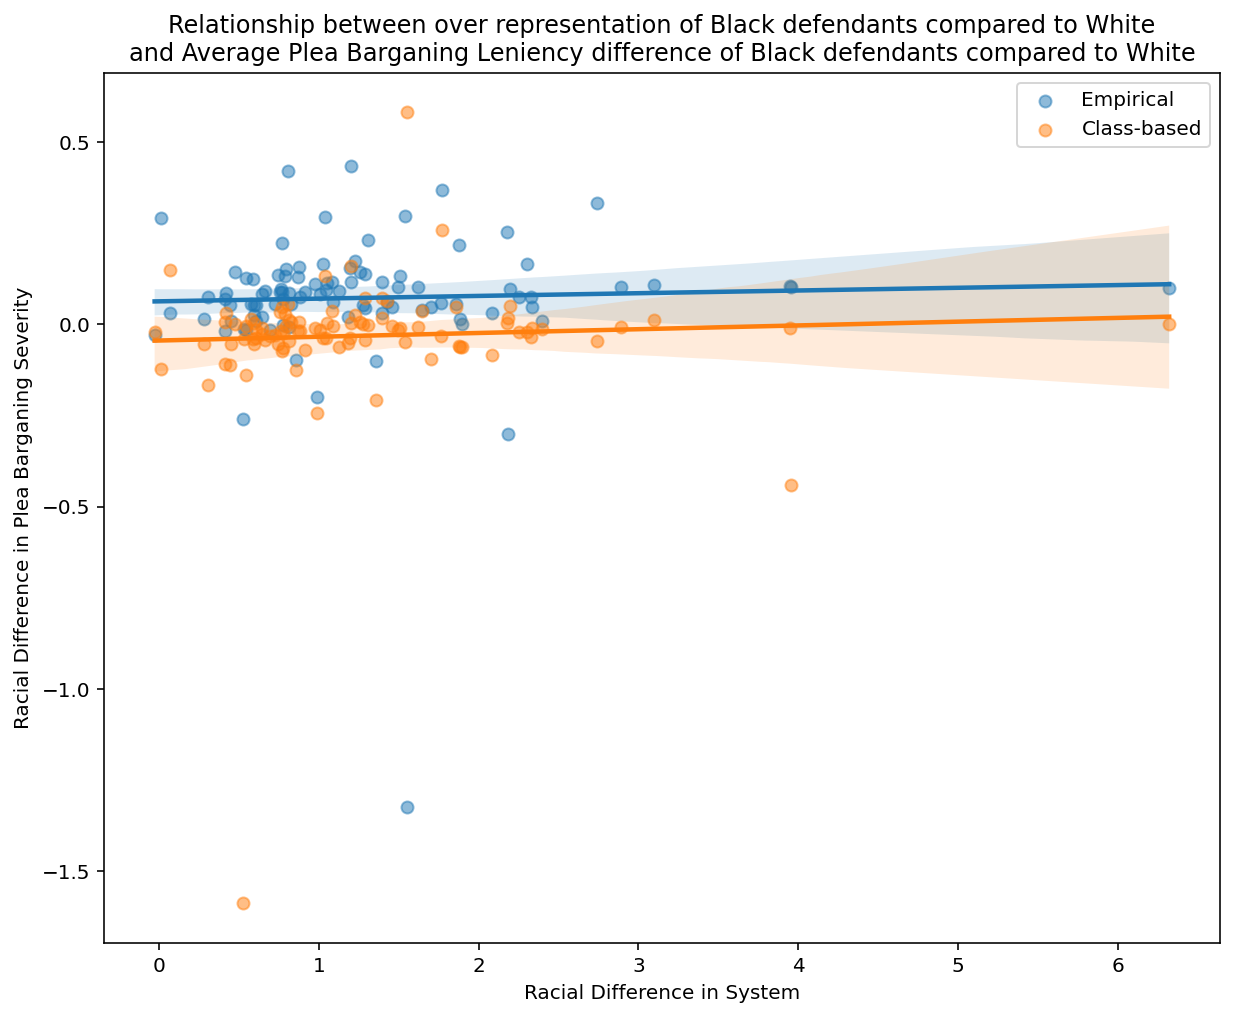

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('Relationship between over representation of Black defendants compared to White\nand Average Plea Barganing Leniency difference of Black defendants compared to White')
sns.regplot(x="weighted_rep_difference_b_w", y="case_DELTA_ms_rel", scatter_kws={'alpha':0.5}, data=scatter, label='Empirical')
sns.regplot(x="weighted_rep_difference_b_w", y="case_DELTA_cl_rel", scatter_kws={'alpha':0.5}, data=scatter,label='Class-based')
plt.xlabel('Racial Difference in System')
plt.legend(loc='upper right')
plt.ylabel('Racial Difference in Plea Barganing Severity')

Text(0, 0.5, 'Racial Difference in Plea Barganing Severity')

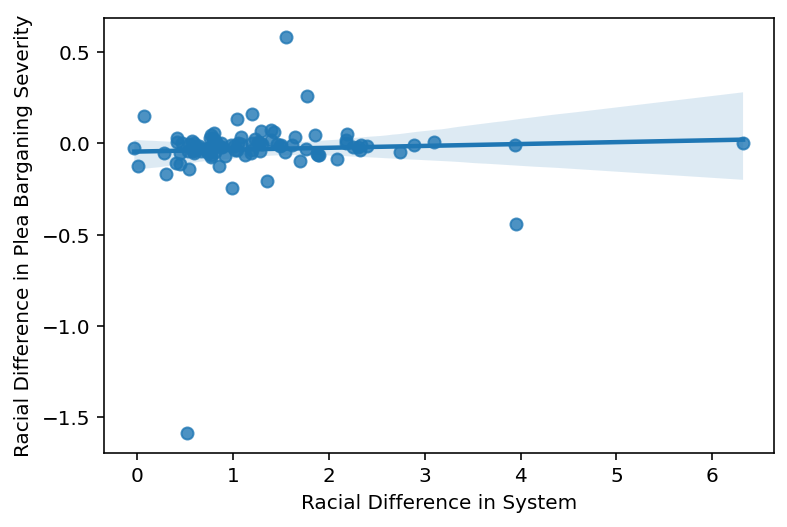

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="weighted_rep_difference_b_w", y="case_DELTA_cl_rel", data=scatter) 
plt.xlabel('Racial Difference in System')
plt.ylabel('Racial Difference in Plea Barganing Severity')

For the Pearson r correlation, both variables should be normally distributed (normally distributed variables have a bell-shaped curve).  Other assumptions include linearity and homoscedasticity.  

In [22]:
#correlated?
corr = scatter['weighted_rep_difference_b_w'].corr(scatter['case_DELTA_ms_rel'])
corr

0.0375425116225186

In [36]:
#correlated?
corr = scatter['weighted_rep_difference_b_w'].corr(scatter['case_DELTA_cl_rel'])
corr

0.05051545001786267

In [14]:
# import geopandas as gpd
# shape = gpd.read_file("/Users/clarissaache/Documents/Capstone/JUSTFAIR_capstone/nhgis0002_shape/nhgis0002_shapefile_tl2020_us_county_2020")
# nc = shape[shape['STATEFP']=='37']
# nc.plot()